- Normalize
    1. PCK
    2. Body length

- Vector 비교법
    1. Json 그림 그리기
    2. vector 뽑고
    3. L2 norm 비교
    4. cosine similarity 비교
    5. flow 비교

In [114]:
import json
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
with open('jjc/300.json') as json_file:
    json_data300 = json.load(json_file)
with open('jjc/400.json') as json_file:
    json_data400 = json.load(json_file)

In [47]:
info_dict = {1 : 0, #left_hip
             2 : 1, #left_knee
             3 : 2, #left_ankle
             6 : 3, #right_hip
             7 : 4, #right_knee
             8 : 5, #right_ankle
             14 : 6, #left_shoulder
             15 : 7, #left_elbow
             16 : 8, #left_wrist
             19 : 9, #right_shoulder
             20 : 10, #right_elbow
             21 : 11, #right_wrist
             24 : 12, #nose
             25 : 13, #left_eye
             26 : 14, #right_eye
             27 : 15, #left_ear
             28 : 16} #right_ear

connect_point = [[1,2,3], #왼쪽다리
                 [6,7,8], #오른쪽다리
                 [14,15,16], #왼쪽팔
                 [19,20,21], # 오른쪽팔
                 [28,26,24,25,27],# 눈코입
                 [1,6,19,14,1]] #몸통
vec_point = [[1,2],[2,3], #왼쪽다리
             [6,7],[7,8], #오른쪽다리
             [14,15],[15,16], #왼쪽팔
             [19,20],[20,21], # 오른쪽팔
             [24,25],[24,26],[24,27],[24,28],# 눈코입
             [6,14],[1,19]] #몸통

In [197]:
def drawimg(point_json, connect_point, save = False):
    point = list(point_json.values())
    img = np.zeros([480,640])+255
    for parts in connect_point:
        for i in range(len(parts)-1):
            p = info_dict[parts[i]]
            q = info_dict[parts[i+1]]
            cv2.line(img, (int(point[p][0]*640), int(point[p][1]*480)), (int(point[q][0]*640), int(point[q][1]*480)), (0,0,0), 3)
    if save:
        plt.imsave(f'save_img/{point[-1]}.png',img, cmap='gray')
    else : plt.imshow(img, cmap='gray')

def extract_vec(point_json, vec_point):
    point = list(point_json.values())
    output_vecs = []
    for parts in vec_point:
        for i in range(len(parts)-1):
            p = info_dict[parts[i]]
            q = info_dict[parts[i+1]]
            x1,y1 = int(point[p][0]*640), int(point[p][1]*480)
            x2,y2 = int(point[q][0]*640), int(point[q][1]*480)
            output_vecs.append((x2-x1,y2-y1))
    return output_vecs

def flow_vec(before_point_json,point_json, vec_point):
    befo_point = extract_vec(before_point_json, vec_point)
    now_point = extract_vec(point_json, vec_point)
    output_flow = []
    for i in range(len(befo_point)):
        output_flow.append((now_point[i][0]-befo_point[i][0],now_point[i][1]-befo_point[i][1]))
    return output_flow

def l2_normalize(gt, target):
    for i in range(len(gt)):
        output = []
        x1,y1 = np.abs(gt[i][0] - target[i][0]), np.abs(gt[i][1] - target[i][1])
        output.append(np.linalg.norm((x1,y1)))
    return np.average(output)

def cosine_similar(gt, target):
    for i in range(len(gt)):
        output = []
        c_s = np.dot(gt[i],target[i])/(np.linalg.norm(gt[i])*np.linalg.norm(target[i]))
        output.append(c_s)
    return np.average(output)


In [199]:
gt = extract_vec(json_data400, vec_point)
o_l2norm = []
for i in range(100):
    t = 350+i
    with open(f'ffc data/jjc/{t}.json') as json_file:
        json_data = json.load(json_file)
        drawimg(json_data, connect_point, save = True)
    tt = extract_vec(json_data, vec_point)
    o_l2norm.append(l2_normalize(gt,tt))

<AxesSubplot:>

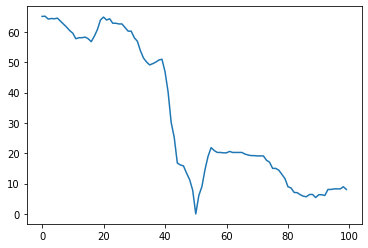

In [200]:
sns.lineplot(x=range(len(o_l2norm)),y=o_l2norm)

In [203]:
gt = extract_vec(json_data400, vec_point)
o_cs = []
for i in range(100):
    t = 350+i
    with open(f'ffc data/jjc/{t}.json') as json_file:
        json_data = json.load(json_file)
        drawimg(json_data, connect_point, save = True)
    tt = extract_vec(json_data, vec_point)
    o_cs.append(cosine_similar(gt,tt))

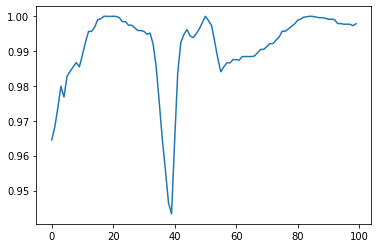

In [204]:
ax = sns.lineplot(x=range(len(o_cs)),y=o_cs)

In [205]:
len(flow_vec(json_data_b,json_data,vec_point))

14

In [206]:
for p in range(16):
    o_flow_right_wrist = []
    for i in range(100):
        t = 350+i
        with open(f'jjc/{t}.json') as json_file:
            json_data = json.load(json_file)
        with open(f'jjc/{t-10}.json') as json_file:
            json_data_b = json.load(json_file)
        temp = np.linalg.norm(flow_vec(json_data_b,json_data,vec_point)[p])
        o_flow_right_wrist.append(temp)
    sns.lineplot(x=range(len(o_flow_right_wrist)),y=o_flow_right_wrist)
    plt.savefig(f'vector/id_{p}.png')

FileNotFoundError: [Errno 2] No such file or directory: 'jjc/350.json'

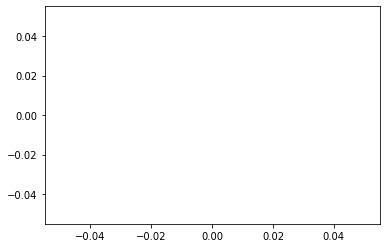

In [207]:
ax = sns.lineplot(x=range(len(o_flow_right_wrist)),y=o_flow_right_wrist)

In [222]:
o_flow = []
for i in range(100):
    t = 350+i
    with open(f'ffc data/jjc/{t:0>3}.json') as json_file:
        json_data = json.load(json_file)
    with open(f'ffc data/jjc/{t-2:0>3}.json') as json_file:
        json_data_b = json.load(json_file)
    temp = []
    for v in range(14):
        temp.append(np.linalg.norm(flow_vec(json_data_b,json_data,vec_point)[v]))
    avg = np.average(temp)
    o_flow.append(avg)

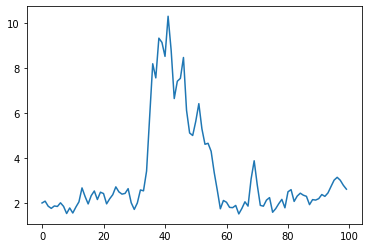

In [223]:
ax = sns.lineplot(x=range(len(o_flow)),y=o_flow)

In [ ]:
info_dict = {'1. left_hip' : 0, #left_hip
             '2. left_knee' : 1, #left_knee
             '3. left_ankle':2, #left_ankle
             '6. right_hip':3, #right_hip
             '7. right_knee':4, #right_knee
             '8. right_ankle':5, #right_ankle
             '14. left_shoulder':6, #left_shoulder
             '15. left_elbow':7, #left_elbow
             '16. left_wrist':8, #left_wrist
             '19. right_shoulder':9, #right_shoulder
             '20. right_elbow':10, #right_elbow
             '21. right_wrist':11, #right_wrist
             '24. nose':12, #nose
             '25. left_eye':13, #left_eye
             '26. right_eye':14, #right_eye
             '27. left_ear':15, #left_ear
             '28. right_ear':16} #right_ear

In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt
import cv2
from dtaidistance import dtw


def l2_normalize(jsonfile):

    with open(jsonfile) as kps:
        json_kps = json.load(kps)

        for frame in range(len(json_kps)):
            keypoints = json_kps[frame]['keypoints']
            box = json_kps[frame]['box']
            temp_x = np.abs(box[0] - box[2]) / 2
            temp_y = np.abs(box[1] - box[3]) / 2

            if temp_x <= temp_y:
                if box[0] <= box[2]:
                    sub_x = box[0] - (temp_y - temp_x)
                else:
                    sub_x = box[2] - (temp_y - temp_x)

                if box[1] <= box[3]:
                    sub_y = box[1]
                else:
                    sub_y = box[3]
            else:
                if box[1] <= box[3]:
                    sub_y = box[1] - (temp_x - temp_y)
                else:
                    sub_y = box[3] - (temp_x - temp_y)

                if box[0] <= box[2]:
                    sub_x = box[0]
                else:
                    sub_x = box[2]

            temp = []
            for _ in range(17):
                temp.append(keypoints[_ * 3] - sub_x)
                temp.append(keypoints[_ * 3 + 1] - sub_y)

            norm = np.linalg.norm(temp)
            for _ in range(17):
                keypoints[_ * 3] = (keypoints[_ * 3] - sub_x) / norm
                keypoints[_ * 3 + 1] = (keypoints[_ * 3 + 1] - sub_y) / norm
                json_kps[frame]['keypoints'] = keypoints

    with open(jsonfile.replace('.json', '_l2norm.json'), 'w') as f:
        json.dump(json_kps, f)
        print('Write l2_norm keypoints')


def weightmatch(label_json, input_json, label_img, input_video):

    with open(label_json) as f:
        label = json.load(f)[0]['keypoints']

    with open(input_json) as f:
        ip_data = json.load(f)

    high_score = 0
    highlight = ''
    score_list = []

    for frame in range(len(ip_data)):
        ip_kpt = ip_data[frame]['keypoints']
        summation_1 = 0
        summation_2 = 0

        for _ in range(17):
            x = np.abs(ip_kpt[_ * 3] - label[_ * 3])
            y = np.abs(ip_kpt[_ * 3 + 1] - label[_ * 3 + 1])
            temp = (2 - (x + y))*50
            summation_1 += ip_kpt[_ * 3 + 2]
            summation_2 += ip_kpt[_ * 3 + 2] * temp
            score_list.append(temp)

        score = summation_2 / summation_1

        if high_score <= score:
            high_score = score
            highlight = ip_data[frame]['image_id']
            score_detail = score_list

    ip_img = cv2.imread(label_img)
    ip_img = cv2.cvtColor(ip_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(18, 9))
    plt.subplot(1, 2, 1)
    plt.imshow(ip_img)
    plt.title('label img')

    cap = cv2.VideoCapture(input_video)
    fr_iter = 0

    while(cap.isOpened()):
        try:
            ret, frame = cap.read()
            if fr_iter == int(highlight.split('.')[0]):
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                plt.subplot(1, 2, 2)
                plt.imshow(frame)
                plt.title('capture img')
                plt.show()
                break
            fr_iter += 1
        except:
            continue

    score_json = {}
    score_json['Frame_Num'] = highlight.split('.')[0]
    score_json['Total_Score'] = high_score
    score_json['Head'] = np.mean(score_detail[0:5])
    score_json['LShoulder'] = score_detail[5]
    score_json['RShoulder'] = score_detail[6]
    score_json['LElbow'] = score_detail[7]
    score_json['RElbow'] = score_detail[8]
    score_json['LWrist'] = score_detail[9]
    score_json['RWrist'] = score_detail[10]
    score_json['LHip'] = score_detail[11]
    score_json['RHip'] = score_detail[12]
    score_json['LKnee'] = score_detail[13]
    score_json['Rknee'] = score_detail[14]
    score_json['LAnkle'] = score_detail[15]
    score_json['RAnkle'] = score_detail[16]

    for (k, v) in score_json.items():
        print(k, ' : ', v, '\n')

    return score_json


def l2_weightmatch(label_json, input_json, label_img, input_video):

    with open(label_json) as f:
        label = json.load(f)[0]['keypoints']

    with open(input_json) as f:
        ip_data = json.load(f)

    high_score = 0
    highlight = ''
    score_list = []

    for frame in range(len(ip_data)):
        ip_kpt = ip_data[frame]['keypoints']
        summation_1 = 0
        summation_2 = 0

        for _ in range(17):
            x = (ip_kpt[_ * 3] - label[_ * 3])**2
            y = (ip_kpt[_ * 3 + 1] - label[_ * 3 + 1])**2
            temp = (np.sqrt(2) - np.sqrt(x + y))*(100/np.sqrt(2))
            summation_1 += ip_kpt[_ * 3 + 2]
            summation_2 += ip_kpt[_ * 3 + 2] * temp
            score_list.append(temp)

        score = summation_2 / summation_1

        if high_score <= score:
            high_score = score
            highlight = ip_data[frame]['image_id']
            score_detail = score_list

    ip_img = cv2.imread(label_img)
    ip_img = cv2.cvtColor(ip_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(18, 9))
    plt.subplot(1, 2, 1)
    plt.imshow(ip_img)
    plt.title('label img')

    cap = cv2.VideoCapture(input_video)
    fr_iter = 0

    while(cap.isOpened()):
        try:
            ret, frame = cap.read()
            if fr_iter == int(highlight.split('.')[0]):
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                plt.subplot(1, 2, 2)
                plt.imshow(frame)
                plt.title('capture img')
                plt.show()
                break
            fr_iter += 1
        except:
            continue

    score_json = {}
    score_json['Frame_Num'] = highlight.split('.')[0]
    score_json['Total_Score'] = high_score
    score_json['Head'] = np.mean(score_detail[0:5])
    score_json['LShoulder'] = score_detail[5]
    score_json['RShoulder'] = score_detail[6]
    score_json['LElbow'] = score_detail[7]
    score_json['RElbow'] = score_detail[8]
    score_json['LWrist'] = score_detail[9]
    score_json['RWrist'] = score_detail[10]
    score_json['LHip'] = score_detail[11]
    score_json['RHip'] = score_detail[12]
    score_json['LKnee'] = score_detail[13]
    score_json['Rknee'] = score_detail[14]
    score_json['LAnkle'] = score_detail[15]
    score_json['RAnkle'] = score_detail[16]

    for (k, v) in score_json.items():
        print(k, ' : ', v, '\n')

    return score_json


def cos_sim(label_json, input_json, label_img, input_video):

    with open(label_json) as f:
        label = json.load(f)[0]['keypoints']

    with open(input_json) as f:
        ip_data = json.load(f)

    high_score = 0
    highlight = ''
    score_list = []

    for frame in range(len(ip_data)):
        ip_kpt = ip_data[frame]['keypoints']
        ip_list = []
        label_list = []

        for _ in range(17):
            temp_ip = []
            temp_la = []
            ip_list.append(ip_kpt[_ * 3])
            ip_list.append(ip_kpt[_ * 3 + 1])
            label_list.append(label[_ * 3])
            label_list.append(label[_ * 3 + 1])

            temp_ip.append(ip_kpt[_ * 3])
            temp_ip.append(ip_kpt[_ * 3 + 1])
            temp_la.append(label[_ * 3])
            temp_la.append(label[_ * 3 + 1])

            cs_temp = np.dot(temp_ip, temp_la) / \
                (np.linalg.norm(temp_ip)*np.linalg.norm(temp_la))
            score_list.append(((2 - np.sqrt(2 * (1 - cs_temp))) / 2) * 100)

        cs_temp = np.dot(ip_list, label_list) / \
            (np.linalg.norm(ip_list)*np.linalg.norm(label_list))
        score = ((2 - np.sqrt(2 * (1 - cs_temp))) / 2) * 100

        if high_score <= score:
            high_score = score
            highlight = ip_data[frame]['image_id']
            score_detail = score_list

    ip_img = cv2.imread(label_img)
    ip_img = cv2.cvtColor(ip_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(18, 9))
    plt.subplot(1, 2, 1)
    plt.imshow(ip_img)
    plt.title('label img')

    cap = cv2.VideoCapture(input_video)
    fr_iter = 0

    while(cap.isOpened()):
        try:
            ret, frame = cap.read()
            if fr_iter == int(highlight.split('.')[0]):
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                plt.subplot(1, 2, 2)
                plt.imshow(frame)
                plt.title('capture img')
                plt.show()
                break
            fr_iter += 1
        except:
            continue

    score_json = {}
    score_json['Frame_Num'] = highlight.split('.')[0]
    score_json['Total_Score'] = high_score
    score_json['Head'] = np.mean(score_detail[0:5])
    score_json['LShoulder'] = score_detail[5]
    score_json['RShoulder'] = score_detail[6]
    score_json['LElbow'] = score_detail[7]
    score_json['RElbow'] = score_detail[8]
    score_json['LWrist'] = score_detail[9]
    score_json['RWrist'] = score_detail[10]
    score_json['LHip'] = score_detail[11]
    score_json['RHip'] = score_detail[12]
    score_json['LKnee'] = score_detail[13]
    score_json['Rknee'] = score_detail[14]
    score_json['LAnkle'] = score_detail[15]
    score_json['RAnkle'] = score_detail[16]

    for (k, v) in score_json.items():
        print(k, ' : ', v, '\n')

    return score_json


def dtw_compare(label_json, input_json):

    with open(label_json) as f:
        label = json.load(f)

    with open(input_json) as f:
        ip_data = json.load(f)

    label_list = []
    ip_list = []
    score = []
    score_json = {}

    for _ in range(17):
        temp_x = []
        temp_y = []
        for frame in range(len(label)):
            temp = label[frame]['keypoints']
            temp_x.append(temp[_ * 3])
            temp_y.append(temp[_ * 3 + 1])
        label_list.append(temp_x)
        label_list.append(temp_y)

    for _ in range(17):
        temp_x = []
        temp_y = []
        for frame in range(len(ip_data)):
            temp = ip_data[frame]['keypoints']
            temp_x.append(temp[_ * 3])
            temp_y.append(temp[_ * 3 + 1])
        ip_list.append(temp_x)
        ip_list.append(temp_y)

    for _ in range(17):
        score_x = dtw.distance(label_list[_ * 2], ip_list[_ * 2])
        score_y = dtw.distance(label_list[_ * 2 + 1], ip_list[_ * 2 + 1])
        score_temp = []
        score_temp.append(100 - (score_x * 100))
        score_temp.append(100 - (score_y * 100))
        score.append(np.mean(score_temp))

    score_json['Total_Score'] = np.mean(score)
    score_json['Head'] = np.mean(score[0:5])
    score_json['LShoulder'] = score[5]
    score_json['RShoulder'] = score[6]
    score_json['LElbow'] = score[7]
    score_json['RElbow'] = score[8]
    score_json['LWrist'] = score[9]
    score_json['RWrist'] = score[10]
    score_json['LHip'] = score[11]
    score_json['RHip'] = score[12]
    score_json['LKnee'] = score[13]
    score_json['Rknee'] = score[14]
    score_json['LAnkle'] = score[15]
    score_json['RAnkle'] = score[16]

    for (k, v) in score_json.items():
        print(k, ' : ', v, '\n')

    return score_json

In [ ]:
import cv2
 
cap = cv2.VideoCapture(0)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
print('original size: %d, %d' % (width, height))
 
cap.set(cv2.CAP_PROP_FRAME_WIDTH, width/3)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height/3)
 
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
print('changed size: %d, %d' % (width, height))


출처: https://hyongdoc.tistory.com/348 [Doony Garage]

In [ ]:
def drawimg(point_json):
    p = list(point_json.values())
    img = np.zeros([480,640])+255
    cv2.line(img, (int(p[0][0]*640), int(p[0][1]*480)), (int(p[1][0]*640), int(p[1][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[1][0]*640), int(p[1][1]*480)), (int(p[2][0]*640), int(p[2][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[3][0]*640), int(p[3][1]*480)), (int(p[4][0]*640), int(p[4][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[4][0]*640), int(p[4][1]*480)), (int(p[5][0]*640), int(p[5][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[6][0]*640), int(p[6][1]*480)), (int(p[7][0]*640), int(p[7][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[7][0]*640), int(p[7][1]*480)), (int(p[8][0]*640), int(p[8][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[9][0]*640), int(p[9][1]*480)), (int(p[10][0]*640), int(p[10][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[10][0]*640), int(p[10][1]*480)), (int(p[11][0]*640), int(p[12][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[16][0]*640), int(p[16][1]*480)), (int(p[14][0]*640), int(p[14][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[14][0]*640), int(p[14][1]*480)), (int(p[12][0]*640), int(p[12][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[12][0]*640), int(p[12][1]*480)), (int(p[13][0]*640), int(p[13][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[13][0]*640), int(p[13][1]*480)), (int(p[15][0]*640), int(p[15][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[0][0]*640), int(p[0][1]*480)), (int(p[3][0]*640), int(p[3][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[3][0]*640), int(p[3][1]*480)), (int(p[9][0]*640), int(p[9][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[9][0]*640), int(p[9][1]*480)), (int(p[6][0]*640), int(p[6][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[6][0]*640), int(p[6][1]*480)), (int(p[0][0]*640), int(p[0][1]*480)), (0,0,0), 3)

    plt.imshow(img)
#     cv2.imshow('lines', img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

def extract_vector(point_json):
    
    p = list(point_json.values())
    vec = []
    cv2.line(img, (int(p[0][0]*640), int(p[0][1]*480)), (int(p[1][0]*640), int(p[1][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[1][0]*640), int(p[1][1]*480)), (int(p[2][0]*640), int(p[2][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[3][0]*640), int(p[3][1]*480)), (int(p[4][0]*640), int(p[4][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[4][0]*640), int(p[4][1]*480)), (int(p[5][0]*640), int(p[5][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[6][0]*640), int(p[6][1]*480)), (int(p[7][0]*640), int(p[7][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[7][0]*640), int(p[7][1]*480)), (int(p[8][0]*640), int(p[8][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[9][0]*640), int(p[9][1]*480)), (int(p[10][0]*640), int(p[10][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[10][0]*640), int(p[10][1]*480)), (int(p[11][0]*640), int(p[12][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[16][0]*640), int(p[16][1]*480)), (int(p[14][0]*640), int(p[14][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[14][0]*640), int(p[14][1]*480)), (int(p[12][0]*640), int(p[12][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[12][0]*640), int(p[12][1]*480)), (int(p[13][0]*640), int(p[13][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[13][0]*640), int(p[13][1]*480)), (int(p[15][0]*640), int(p[15][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[0][0]*640), int(p[0][1]*480)), (int(p[3][0]*640), int(p[3][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[3][0]*640), int(p[3][1]*480)), (int(p[9][0]*640), int(p[9][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[9][0]*640), int(p[9][1]*480)), (int(p[6][0]*640), int(p[6][1]*480)), (0,0,0), 3)
    cv2.line(img, (int(p[6][0]*640), int(p[6][1]*480)), (int(p[0][0]*640), int(p[0][1]*480)), (0,0,0), 3)    
    